In [15]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
# Load the dataset
data = pd.read_csv('online_shoppers_intention.csv')


In [4]:
# missing values
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
print(data.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

In [7]:
# Plot distribution of numerical features
numerical_features = [
    "Administrative", "Administrative_Duration", "Informational",
    "Informational_Duration", "ProductRelated", "ProductRelated_Duration",
    "BounceRates", "ExitRates", "PageValues", "SpecialDay"
]

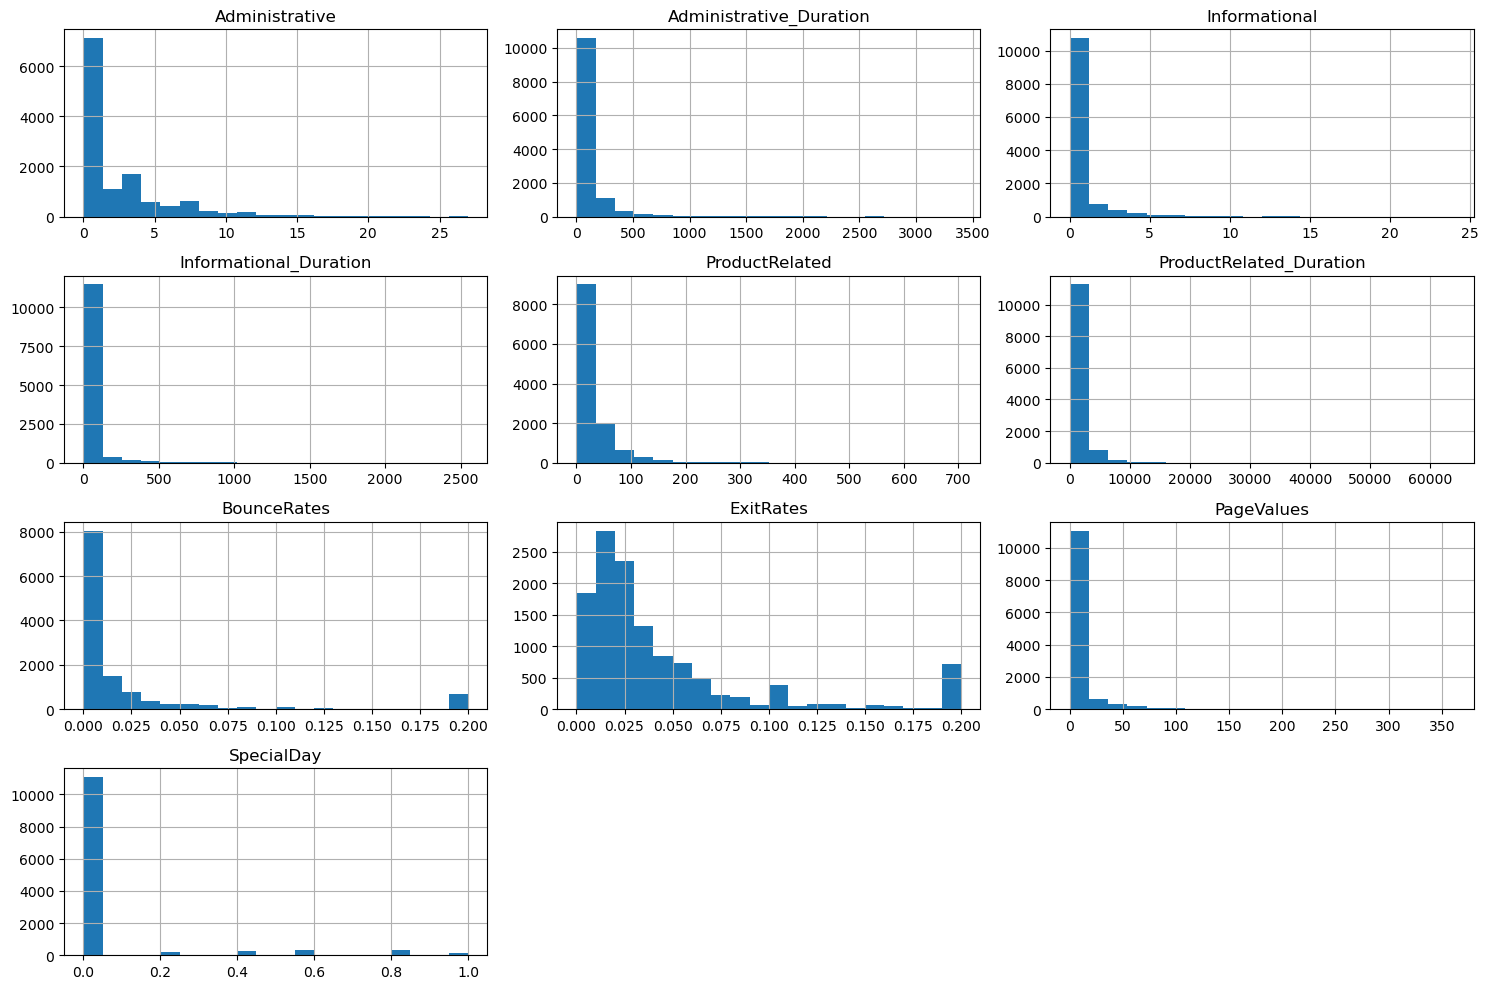

In [8]:
# Plot histograms for numerical features
data[numerical_features].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

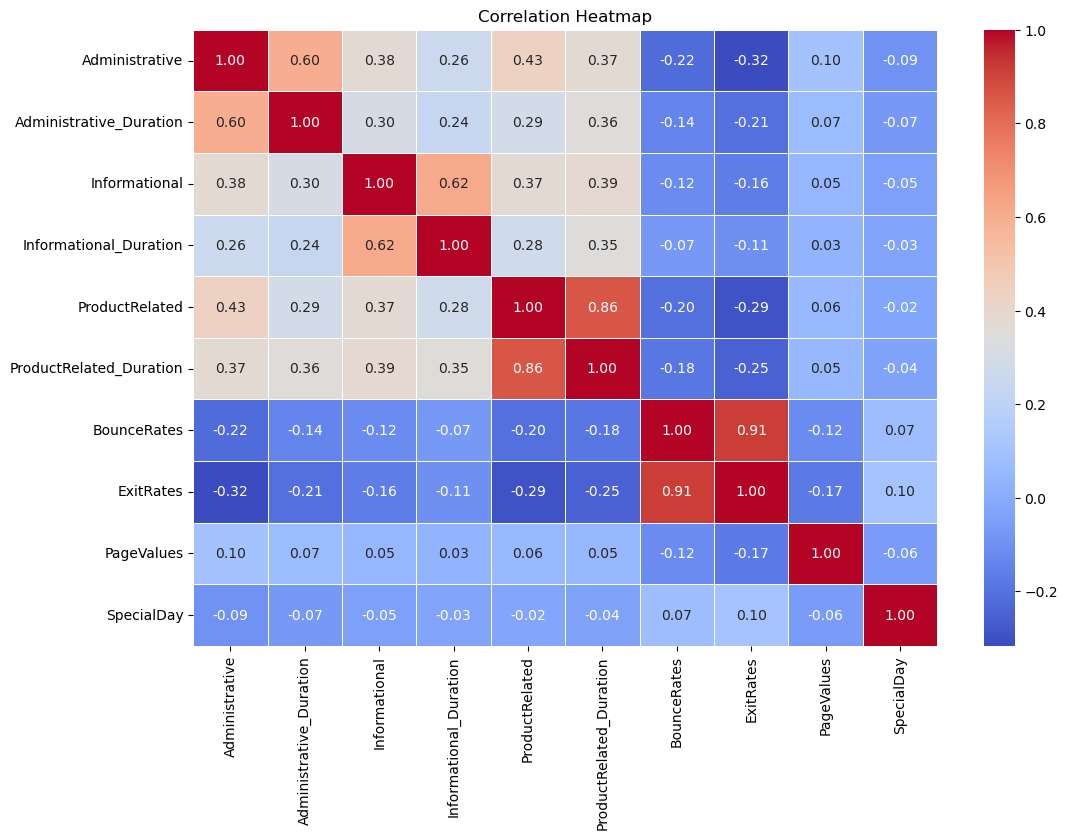

In [9]:
# Correlation heatmap
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\krishna rohit\AppData\Local\Temp\ipykernel_13596\780124754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, ax=axes[i // 2, i % 2], palette="Set2")
C:\Users\krishna rohit\AppData\Local\Temp\ipykernel_13596\780124754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, ax=axes[i // 2, i % 2], palette="Set2")
C:\Users\krishna rohit\AppData\Local\Temp\ipykernel_13596\780124754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, ax=axes[i // 2, i % 2], palette="Se

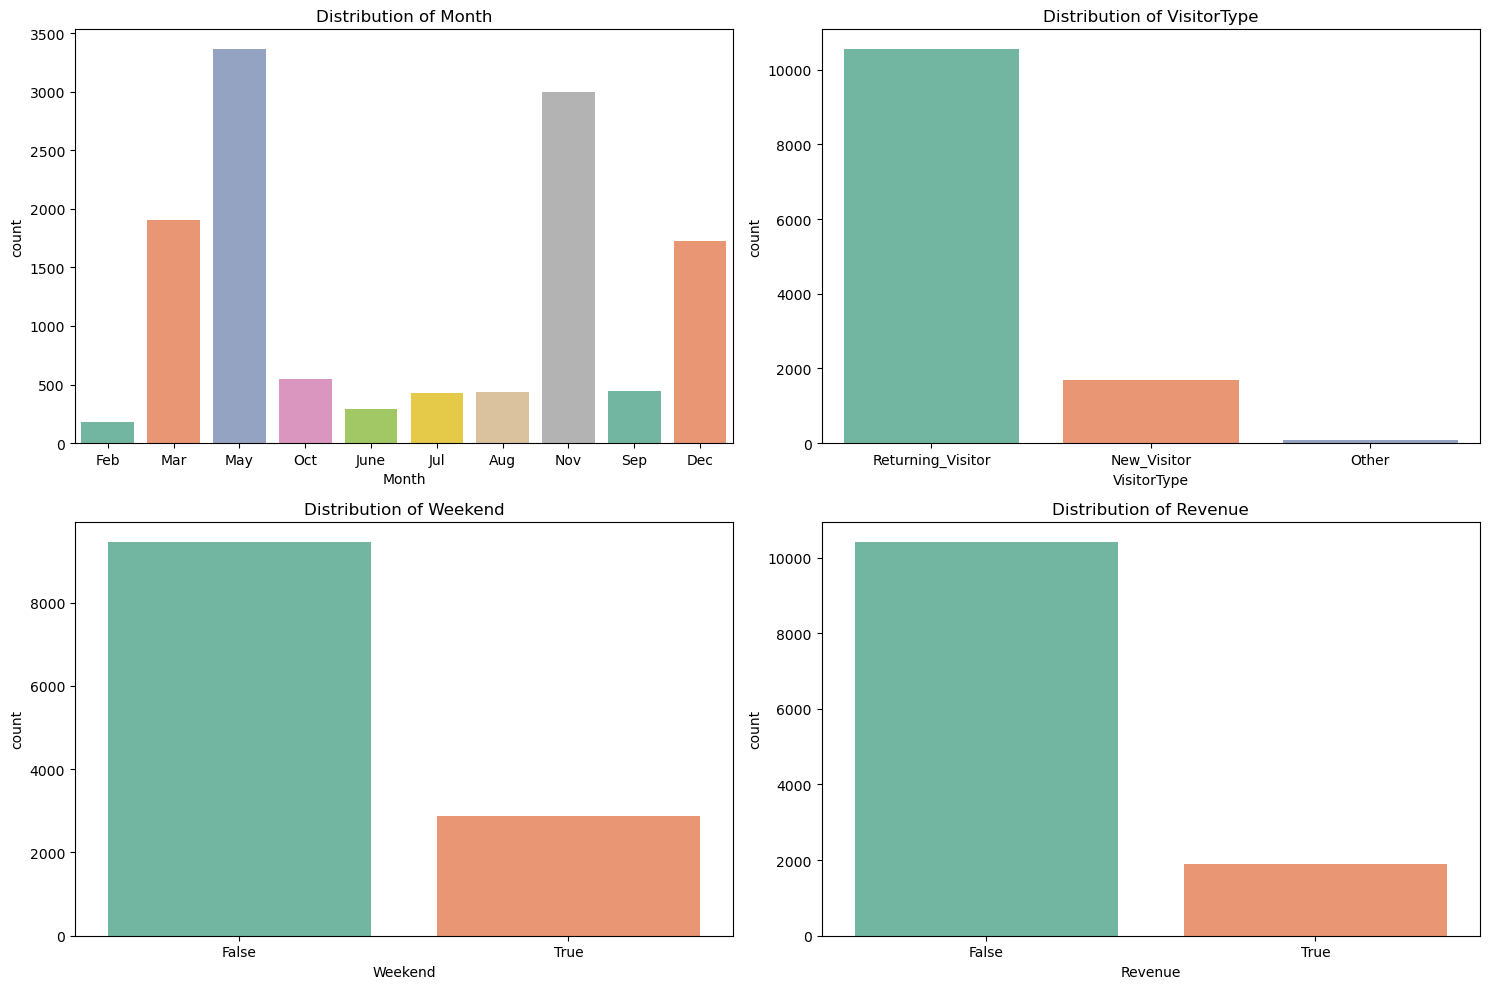

In [10]:
#Plots for categorical features
categorical_features = ["Month", "VisitorType", "Weekend", "Revenue"]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, ax=axes[i // 2, i % 2], palette="Set2")
    axes[i // 2, i % 2].set_title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [11]:
# Define preprocessing pipeline
numerical_features = [
    "Administrative", "Administrative_Duration", "Informational",
    "Informational_Duration", "ProductRelated", "ProductRelated_Duration",
    "BounceRates", "ExitRates", "PageValues", "SpecialDay"
]
categorical_features = ["Month", "VisitorType", "Weekend"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)
# Exclude target variable for clustering
X = data.drop(columns=["Revenue"])
X_preprocessed = preprocessor.fit_transform(X)

print(f"Shape of preprocessed data: {X_preprocessed.shape}")

Shape of preprocessed data: (12330, 22)


In [12]:
#Applying K-means clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_preprocessed)

# Evaluating K-Means
silhouette_avg_kmeans = silhouette_score(X_preprocessed, kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette_avg_kmeans}")

# Add cluster labels to the dataset
data['Cluster_KMeans'] = kmeans_labels


Silhouette Score for K-Means: 0.31124527956133385


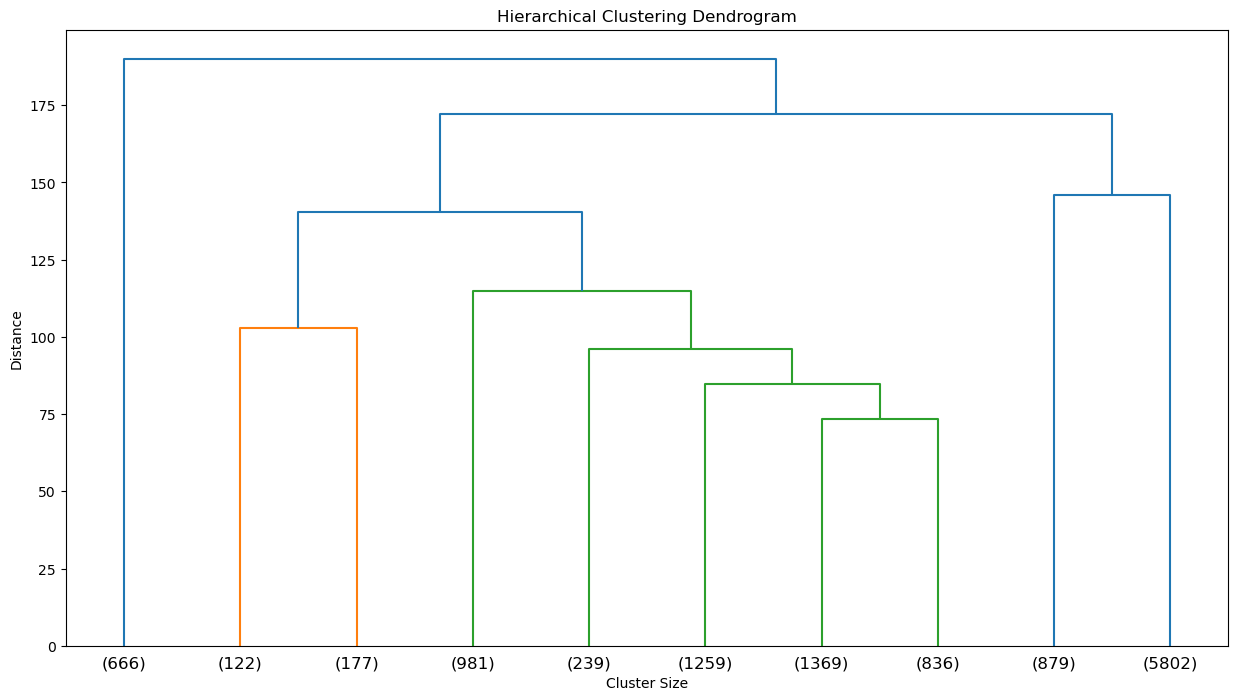

Silhouette Score for Hierarchical Clustering: 0.18169073759488977


In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering dendrogram
linkage_matrix = linkage(X_preprocessed, method='ward')
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_cluster.fit_predict(X_preprocessed)

# Evaluate Agglomerative Clustering
silhouette_avg_agg = silhouette_score(X_preprocessed, agg_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_agg}")

# Add cluster labels to the dataset
data['Cluster_Hierarchical'] = agg_labels


Cluster_KMeans
1    10380
2      984
0      966
Name: count, dtype: int64
Cluster_Hierarchical
0    6681
2    4983
1     666
Name: count, dtype: int64


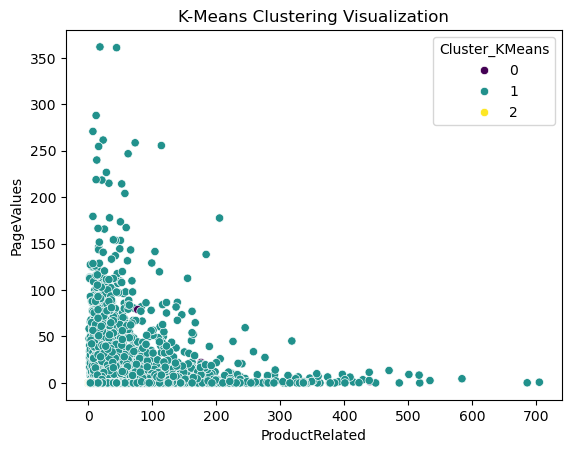

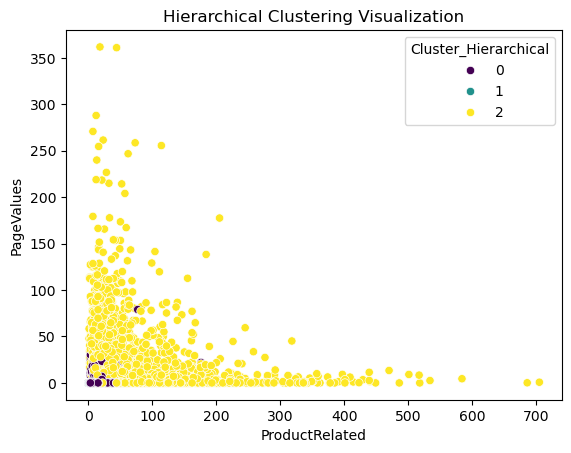

In [14]:
# Comparing cluster sizes and visualizing them 
print(data['Cluster_KMeans'].value_counts())
print(data['Cluster_Hierarchical'].value_counts())

sns.scatterplot(data=data, x="ProductRelated", y="PageValues", hue="Cluster_KMeans", palette="viridis")
plt.title('K-Means Clustering Visualization')
plt.show()

sns.scatterplot(data=data, x="ProductRelated", y="PageValues", hue="Cluster_Hierarchical", palette="viridis")
plt.title('Hierarchical Clustering Visualization')
plt.show()
